#### What is a Neural Network?

A **Neural Network** is a computational model inspired by the brain's neural networks. It consists of layers of interconnected nodes or neurons, where each connection represents a weight that is adjusted during training. Neural networks are particularly effective for complex tasks like image recognition, natural language processing, and more.

![Neural Network Model conceptualization](Neural_Networks.jpg)

Image source: https://orgs.mines.edu/daa/blog/2019/08/05/neural-networks-mva/

#### Mathematical Model

A neural network typically consists of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to every neuron in the subsequent layer. The strength of these connections is defined by weights, which are adjusted during training.

The output \(y\) of a neuron is given by:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

where \(x_i\) are inputs, \(w_i\) are weights, \(b\) is a bias, and \(f\) is an activation function such as the sigmoid, tanh, or ReLU.

#### Why Use Neural Networks for Image Recognition?

Neural networks can automatically learn and improve from experience without being explicitly programmed. For image recognition, convolutional neural networks (CNNs) are especially powerful as they can pick up on spatial hierarchies in images.



In [2]:
# We begin by importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

c:\Users\aburr\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Loading and Preprocessing Images

Create a dataframe `df` that contains the filenames and their corresponding labels, using the corrected label extraction method.

In [3]:
# Path to the image directory
image_dir = './homer_bart'

# List all files in the directory
files = os.listdir(image_dir)

# Create dataframe with filenames and labels, extracting labels correctly
df = pd.DataFrame({
    'filename': files,
    'label': [f.split('X')[0] for f in files]  # Correct label extraction
})

df['label'] = df['filename'].apply(lambda x: 'homer' if 'homer' in x else 'bart')

# Verify the label extraction by displaying unique labels and their counts
print(df['label'].value_counts())

label
bart     160
homer    109
Name: count, dtype: int64


#### Image Data Generator

Use Keras's `ImageDataGenerator` for real-time data augmentation and normalization.


In [4]:
# Initialize the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2, validation_split=0.2)

# Setup the flow from directory
train_generator = train_datagen.flow_from_dataframe(
    df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32,
    subset='validation'
)


Found 216 validated image filenames belonging to 2 classes.
Found 53 validated image filenames belonging to 2 classes.


#### Defining the Model

Construct a simple CNN model.


In [7]:
from tensorflow.keras.layers import Input

# Define the model using the Input layer
model = Sequential([
    Input(shape=(64, 64, 3)),  # Specify the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#### Training the Model

Train the model using the data generators and visualize the training process.


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9806 - loss: 0.0750 - val_accuracy: 0.8113 - val_loss: 0.5115
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9883 - loss: 0.0565 - val_accuracy: 0.9245 - val_loss: 0.1921
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9955 - loss: 0.0462 - val_accuracy: 0.9245 - val_loss: 0.2395
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9913 - loss: 0.0353 - val_accuracy: 0.7925 - val_loss: 0.7284
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9740 - loss: 0.0657 - val_accuracy: 0.9623 - val_loss: 0.1499
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9829 - loss: 0.0372 - val_accuracy: 0.8868 - val_loss: 0.5030
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9863 - loss: 0.0334 - val_accuracy: 0.8302 - val_loss: 0.5643
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9898 - loss: 0.0357 - val_accuracy: 0.9623 - val_loss: 0.1340


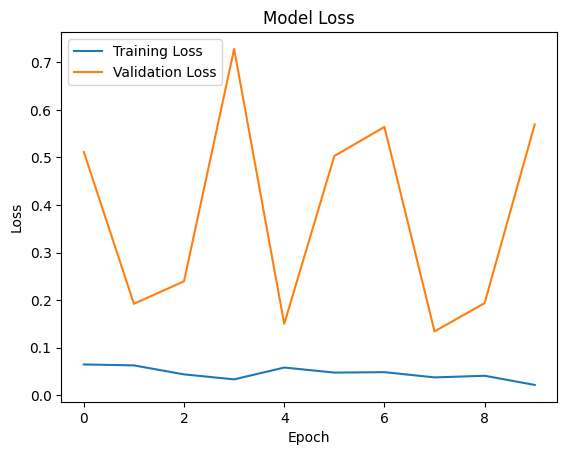

In [22]:
# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


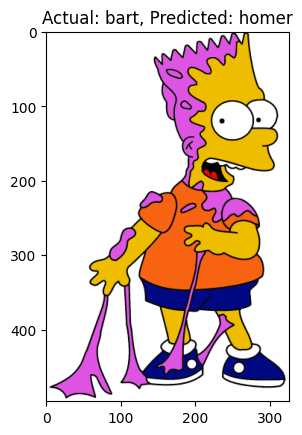

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


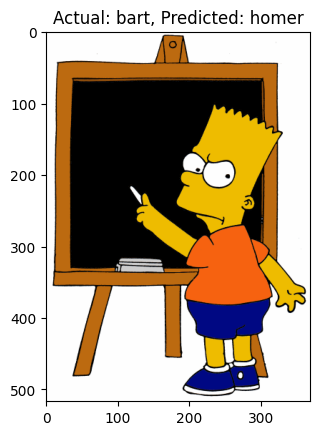

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


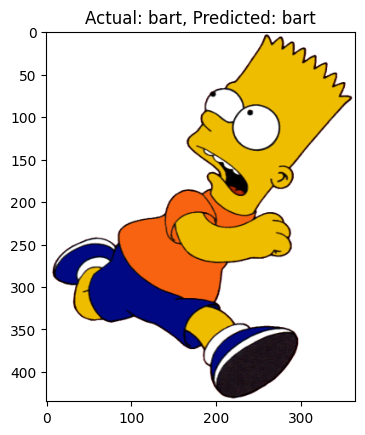

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


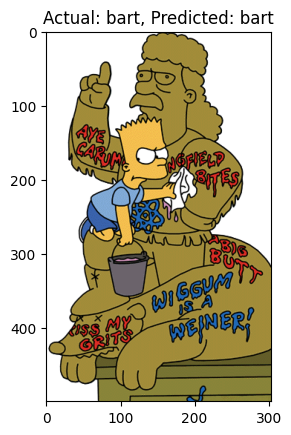

In [23]:
#Show some predictions (4) and their actual labels
for i in range(4):
    plt.figure()
    plt.imshow(Image.open(image_dir + '/' + df['filename'][i]))
    plt.title('Actual: ' + df['label'][i] + ', Predicted: ' + ('homer' if model.predict(np.expand_dims(train_generator[i][0][0], axis=0)) > 0.5 else 'bart'))

    plt.show()

Although the model got some good results some of the predictions were not correct. We can implement dropout and regularization to improve the model.:
* Dropout is a technique used in neural networks to prevent overfitting by randomly dropping out, or "turning off", neurons during training. This forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. 
* Regularization, on the other hand, is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It does this by adding a penalty on the different parameters of the model to reduce the freedom of the model and in turn, minimize overfitting.

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5435 - loss: 1.3058 - val_accuracy: 0.0000e+00 - val_loss: 1.5004
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5464 - loss: 1.2552 - val_accuracy: 0.9811 - val_loss: 1.0189
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5807 - loss: 1.0593 - val_accuracy: 0.9811 - val_loss: 0.9053
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6855 - loss: 0.9435 - val_accuracy: 0.9245 - val_loss: 0.7499
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7479 - loss: 0.8623 - val_accuracy: 0.6981 - val_loss: 0.8959
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6324 - loss: 0.9119 - val_accuracy: 0.9057 - val_loss: 0.6622
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7384 - loss: 0.8212 - val_accuracy: 0.8868 - val_loss: 0.6964
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7449 - loss: 0.7623 - val_accuracy: 0.8868 - val_loss: 0.6

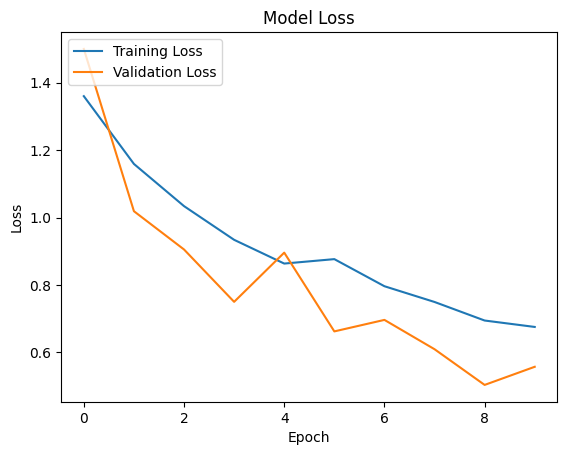

In [25]:
#We got some predictions wrong, let's try to improve the model by adding dropout and regularization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define the model with dropout and regularization
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


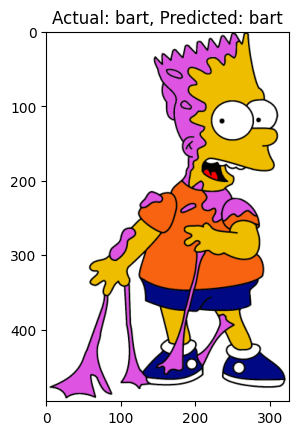

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


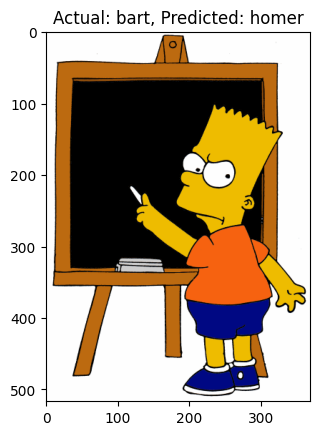

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


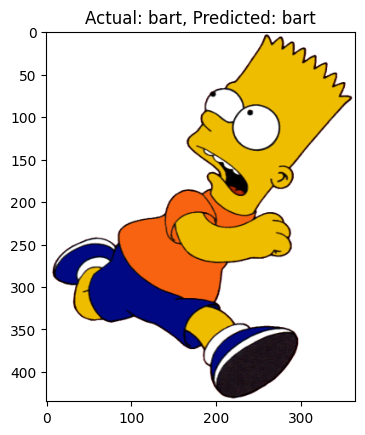

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


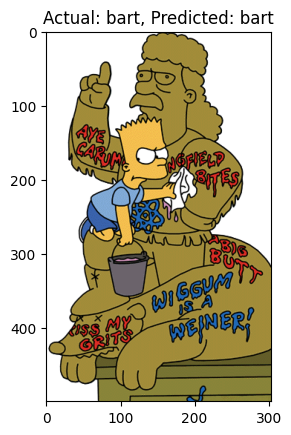

In [26]:
#Show some predictions (4) and their actual labels
for i in range(4):
    plt.figure()
    plt.imshow(Image.open(image_dir + '/' + df['filename'][i]))
    plt.title('Actual: ' + df['label'][i] + ', Predicted: ' + ('homer' if model.predict(np.expand_dims(train_generator[i][0][0], axis=0)) > 0.5 else 'bart'))
    plt.show()

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.4952 - loss: 4.1044 - val_accuracy: 0.0000e+00 - val_loss: 1.0228
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6676 - loss: 1.1917 - val_accuracy: 0.0377 - val_loss: 0.7797
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7423 - loss: 0.5318 - val_accuracy: 0.9623 - val_loss: 0.5726
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6853 - loss: 0.6156 - val_accuracy: 0.7547 - val_loss: 0.6498
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7831 - loss: 0.4690 - val_accuracy: 0.8491 - val_loss: 0.5363
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8152 - loss: 0.4086 - val_accuracy: 1.0000 - val_loss: 0.2216
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8473 - loss: 0.3653 - val_accuracy: 0.9623 - val_loss: 0.1440
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7674 - loss: 0.4330 - val_accuracy: 0.9811 - val_loss: 0.1

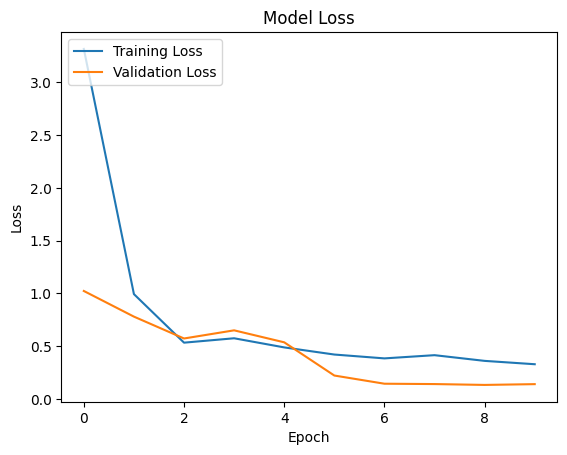

In [28]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


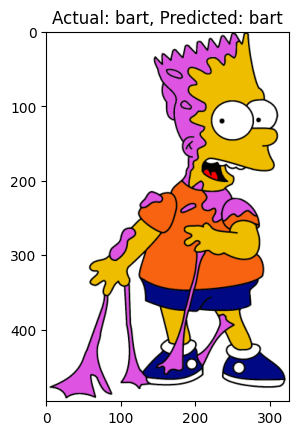

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


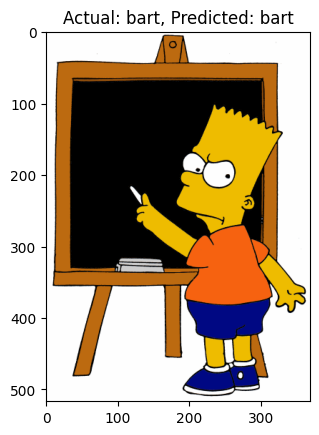

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


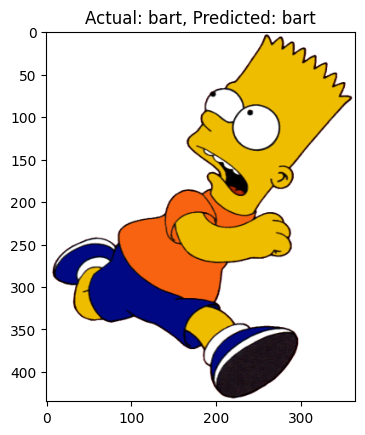

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


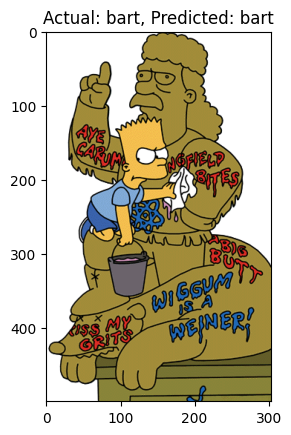

In [31]:
#Show some predictions (4) and their actual labels
for i in range(4):
    plt.figure()
    plt.imshow(Image.open(image_dir + '/' + df['filename'][i]))
    plt.title('Actual: ' + df['label'][i] + ', Predicted: ' + ('homer' if model.predict(np.expand_dims(train_generator[i][0][0], axis=0)) > 0.5 else 'bart'))
    plt.show()

After two iterations we can see that the model improved a lot in predicting the actual labels. The model is now able to predict the labels correctly.

#### Conclusion 
In this Jupyter Notebook, we successfully implemented and trained a convolutional neural network (CNN) model to classify images of Homer and Bart Simpson. Through this exercise, we observed the importance of properly preprocessing data, designing an appropriate model architecture, and fine-tuning the training process.

This project serves as a practical example of how neural networks can be applied to real-world image classification tasks. The skills and insights gained here can be applied to broader image recognition challenges and other complex machine learning tasks, paving the way for deeper exploration and application of artificial intelligence in various domains.